In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/cpreeldumas/Documents/GitHub/MLC_SP23/clean_data/merged_data_v3.csv", low_memory=False, index_col=[0])
df.head()


,bbl,total_units_19,year_built,ejectment_count,possession_count,eviction_count,aleration_count,altered_lessthan5yrs,altered_morethan5yrs,classanet_avg,...,boro_3,boro_4,boro_5,rs_share_diff_new,hpd_call_2017_19,hh_inc_avg_19_log1,pop_race_asian_pct_19_log1,pop_race_black_pct_19_log1,pop16_unemp_pct_19_log1,pop_mobile1_diff_state_pct_19_log1
0,1000780047,483,2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,4.0,12.276639,0.150551,0.018246,0.035008,0.074674
1,1001350019,4,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,0.0,12.897523,0.096864,0.055298,0.002253,0.014341
2,1001620013,20,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1.0,2.0,10.973689,0.461379,0.096629,0.037102,0.008935
3,1001630024,16,1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.0,1.0,10.973689,0.461379,0.096629,0.037102,0.008935
4,1001630033,11,1915,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0.0,0.0,10.973689,0.461379,0.096629,0.037102,0.008935


<AxesSubplot:>

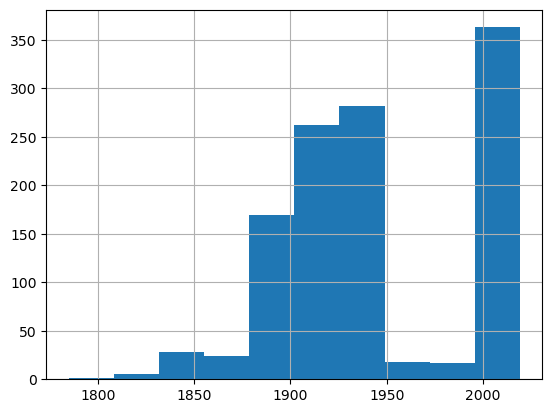

In [8]:
df.query("`total_units_19` < 6 and rs_share_diff_new == 1").loc[:,'year_built'].hist()

# Plain Logistic Regression, statsmodel

### Feature-importance variables

In [9]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

X = df[["total_units_19","year_built","hpd_call_2017_19", "pop_race_black_pct_19_log1", "hh_alone_pct_19", "rent_contract_med_19", "pop_edu_hs_pct_19", "hh_inc_avg_19_log1", "unit_rent_cash_mod_high_pct_19", "hh_inc_pubasst_snap_pct_19", "pop_edu_collp_pct_19", "pop_rent_pct_19", "dob_calls_2018", "dob_calls_2019", "pop_race_white_pct_19"]]
y = df['rs_share_diff_new']


logreg = sm.Logit(y, X).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.603454
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      rs_share_diff_new   No. Observations:                38955
Model:                          Logit   Df Residuals:                    38940
Method:                           MLE   Df Model:                           14
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                 0.05770
Time:                        15:22:13   Log-Likelihood:                -23508.
converged:                       True   LL-Null:                       -24947.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
total_units_19                    -0.0028      0.000     -9.031     

### All Variables

In [10]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1)
y = df['rs_share_diff_new']

logreg = sm.Logit(y, X).fit()
print(logreg.summary())

         Current function value: 0.579756
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      rs_share_diff_new   No. Observations:                38955
Model:                          Logit   Df Residuals:                    38882
Method:                           MLE   Df Model:                           72
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                 0.09471
Time:                        15:22:19   Log-Likelihood:                -22584.
converged:                      False   LL-Null:                       -24947.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
total_units_19                         0.0001      0.000      0.456      0.649      -0.000      

/Users/cpreeldumas/opt/anaconda3/envs/pgmpy2/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


# Train-test split

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1)
y = df['rs_share_diff_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Scaling

In [14]:
# scaling to have mean = 0 and std = 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Plain Logistic Regression, sklearn

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import metrics

logreg = LogisticRegression()

# Training
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test,y_pred)

# AUC
y_pred_proba = logreg.predict_proba(X_test)[:,1]
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Printing the results
print("Accuracy is",accuracy)
print("AUC is", auc)

Accuracy is 0.7173221069925043
AUC is 0.6963758656443391


# GridSearchCV with Ridge & Lasso

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

scoring = {'Accuracy':'accuracy',
           'F1 Score':'f1',
           'Precision':'precision',
           'Recall':'recall',
           'AUC':'roc_auc'}

# l1 = lasso l2 = ridge
parameters = {'penalty':['l1','l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,  
                   scoring= scoring,  
                   refit = "AUC",
                   cv=5)                    


# Training
fit = clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_) # why is there no best param for penalty? 
print("Best Score :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Score : 0.6998792534264195


In [17]:
# All CV metrics for best model

best_params_index = fit.cv_results_['rank_test_AUC'][0] - 1
print("Best model AUC:", fit.cv_results_['mean_test_AUC'][best_params_index])
print("Best model accuracy:", fit.cv_results_['mean_test_Accuracy'][best_params_index])
print("Best model F1 score:", fit.cv_results_['mean_test_F1 Score'][best_params_index])
print("Best model precision:", fit.cv_results_['mean_test_Precision'][best_params_index])
print("Best model recall:", fit.cv_results_['mean_test_Recall'][best_params_index])

Best model AUC: nan
Best model accuracy: nan
Best model F1 score: nan
Best model precision: nan
Best model recall: nan


In [18]:
# test set
from sklearn import metrics

y_hat_test = fit.predict(X_test) 
auc = metrics.roc_auc_score(y_test, y_hat_test)
acc = metrics.accuracy_score(y_test, y_hat_test)
f1 = metrics.f1_score(y_test, y_hat_test)
prec = metrics.precision_score(y_test, y_hat_test)
rec = metrics.recall_score(y_test, y_hat_test)

print("Out of sample AUC is:", auc)
print("Out of sample accuracy is:", acc)
print("Out of sample F1 score is:", f1)
print("Out of sample precision is:", prec)
print("Out of sample recall is:", rec)

Out of sample AUC is: 0.6335037869206441
Out of sample accuracy is: 0.7186569462983879
Out of sample F1 score is: 0.47185813415574396
Out of sample precision is: 0.6378322042730589
Out of sample recall is: 0.3744264301009483


Feature: 0, Score: 0.01666
Feature: 1, Score: -0.14621
Feature: 2, Score: 0.04408
Feature: 3, Score: -0.06769
Feature: 4, Score: -0.03381
Feature: 5, Score: -0.02879
Feature: 6, Score: 0.02461
Feature: 7, Score: 0.04456
Feature: 8, Score: -0.03643
Feature: 9, Score: -0.02155
Feature: 10, Score: 0.02369
Feature: 11, Score: 0.02964
Feature: 12, Score: 0.00147
Feature: 13, Score: -0.10423
Feature: 14, Score: -0.10777
Feature: 15, Score: -0.06129
Feature: 16, Score: -0.01161
Feature: 17, Score: -0.00444
Feature: 18, Score: -0.05078
Feature: 19, Score: 0.04500
Feature: 20, Score: 0.03208
Feature: 21, Score: 0.06908
Feature: 22, Score: 0.00116
Feature: 23, Score: -0.02450
Feature: 24, Score: -0.01640
Feature: 25, Score: -0.04238
Feature: 26, Score: 0.02131
Feature: 27, Score: -0.03270
Feature: 28, Score: 0.01444
Feature: 29, Score: 0.00091
Feature: 30, Score: 0.02859
Feature: 31, Score: -0.01201
Feature: 32, Score: -0.02030
Feature: 33, Score: -0.01988
Feature: 34, Score: 0.01780
Feature: 35

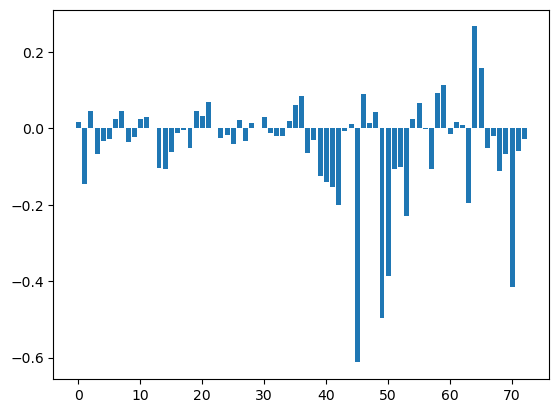

In [26]:
from matplotlib import pyplot as plt

# get importance
logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Tuning History

In [ ]:
# Without scaling, same parameters

# Out of sample AUC is: 0.5
# Out of sample accuracy is: 0.6660849928146171
# Out of sample F1 score is: 0.0
# Out of sample precision is: 0.0
# Out of sample recall is: 0.0

# V2.1 Only buildings < 6

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1).loc[df['total_units_19'] < 6]
y = df['rs_share_diff_new'].loc[df['total_units_19'] < 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# scaling to have mean = 0 and std = 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

scoring = {'Accuracy':'accuracy',
           'F1 Score':'f1',
           'Precision':'precision',
           'Recall':'recall',
           'AUC':'roc_auc'}

# l1 = lasso l2 = ridge
parameters = {'penalty':['l1','l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,  
                   scoring= scoring,  
                   refit = "AUC",
                   cv=5)                    


# Training
fit = clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_) # why is there no best param for penalty? 
print("Best Score :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l2'}
Best Score : 0.8282203883686936


In [44]:
# test set
from sklearn import metrics

y_hat_test = fit.predict(X_test) 
auc = metrics.roc_auc_score(y_test, y_hat_test)
acc = metrics.accuracy_score(y_test, y_hat_test)
f1 = metrics.f1_score(y_test, y_hat_test)
prec = metrics.precision_score(y_test, y_hat_test)
rec = metrics.recall_score(y_test, y_hat_test)

print("Out of sample AUC is:", auc)
print("Out of sample accuracy is:", acc)
print("Out of sample F1 score is:", f1)
print("Out of sample precision is:", prec)
print("Out of sample recall is:", rec)

Out of sample AUC is: 0.6191327375041377
Out of sample accuracy is: 0.8757396449704142
Out of sample F1 score is: 0.930921052631579
Out of sample precision is: 0.8761609907120743
Out of sample recall is: 0.9929824561403509


# V2.1 Only buildings >= 6

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(['rs_share_diff_new', 'bbl'], axis = 1).loc[df['total_units_19'] >= 6]
y = df['rs_share_diff_new'].loc[df['total_units_19'] >= 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# scaling to have mean = 0 and std = 1
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

scoring = {'Accuracy':'accuracy',
           'F1 Score':'f1',
           'Precision':'precision',
           'Recall':'recall',
           'AUC':'roc_auc'}

# l1 = lasso l2 = ridge
parameters = {'penalty':['l1','l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,  
                   scoring= scoring,  
                   refit = "AUC",
                   cv=5)                    


# Training
fit = clf.fit(X_train,y_train)

print("Tuned Hyperparameters :", clf.best_params_) # why is there no best param for penalty? 
print("Best Score :", clf.best_score_)

Tuned Hyperparameters : {'C': 0.1, 'penalty': 'l2'}
Best Score : 0.7007476349898726


In [53]:
# test set
from sklearn import metrics

y_hat_test = fit.predict(X_test) 
auc = metrics.roc_auc_score(y_test, y_hat_test)
acc = metrics.accuracy_score(y_test, y_hat_test)
f1 = metrics.f1_score(y_test, y_hat_test)
prec = metrics.precision_score(y_test, y_hat_test)
rec = metrics.recall_score(y_test, y_hat_test)

print("Out of sample AUC is:", auc)
print("Out of sample accuracy is:", acc)
print("Out of sample F1 score is:", f1)
print("Out of sample precision is:", prec)
print("Out of sample recall is:", rec)

Out of sample AUC is: 0.6399660860294091
Out of sample accuracy is: 0.7363046484416551
Out of sample F1 score is: 0.47467683831320195
Out of sample precision is: 0.6553540081919251
Out of sample recall is: 0.37209302325581395
